<a href="https://colab.research.google.com/github/alexyev/pytorch_projects/blob/main/pytorch_3_nn_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets

In [3]:
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True, 
                      transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [4]:
import torch.nn as nn
import torch.nn.functional as F

In [5]:
class Net(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)

In [7]:
output = net(X)

In [8]:
output

tensor([[-2.2027, -2.1248, -2.3058, -2.2238, -2.2696, -2.4446, -2.3644, -2.4217,
         -2.4163, -2.3025]], grad_fn=<LogSoftmaxBackward0>)

In [9]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

In [10]:
for epoch in range(EPOCHS):
  for data in trainset:
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.1202, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)


In [12]:
correct = 0
total = 0

with torch.no_grad():
  for data in trainset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1
print('Accuracy: ', round(correct/total, 3))

Accuracy:  0.979


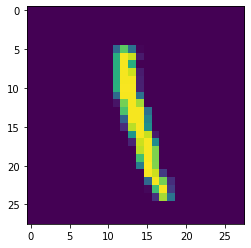

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [22]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(1)
